['PSX', 'APC', 'HAL', 'WMB', 'VLO', 'MPC', 'BHI', 'SE', 'DVN', 'APA']
34.68
34.76
34.91
[{'Volume': '10862500', 'Symbol': 'YHOO', 'Adj_Close': '33.709999', 'High': '33.889999', 'Low': '33.470001', 'Date': '2015-12-01', 'Close': '33.709999', 'Open': '33.869999'}, {'Volume': '17363600', 'Symbol': 'YHOO', 'Adj_Close': '33.810001', 'High': '33.830002', 'Low': '32.849998', 'Date': '2015-11-30', 'Close': '33.810001', 'Open': '33.029999'}, {'Volume': '5313400', 'Symbol': 'YHOO', 'Adj_Close': '32.939999', 'High': '33.09', 'Low': '32.439999', 'Date': '2015-11-27', 'Close': '32.939999', 'Open': '32.790001'}, {'Volume': '13257200', 'Symbol': 'YHOO', 'Adj_Close': '33.16', 'High': '33.52', 'Low': '32.75', 'Date': '2015-11-25', 'Close': '33.16', 'Open': '32.77'}, {'Volume': '13364700', 'Symbol': 'YHOO', 'Adj_Close': '32.959999', 'High': '33.189999', 'Low': '32.610001', 'Date': '2015-11-24', 'Close': '32.959999', 'Open': '33.09'}, {'Volume': '11899700', 'Symbol': 'YHOO', 'Adj_Close': '33.360001', 'Hi

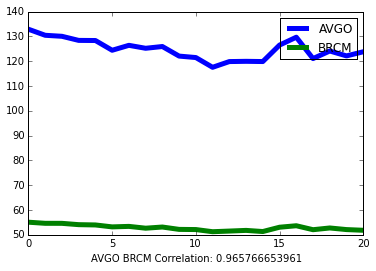

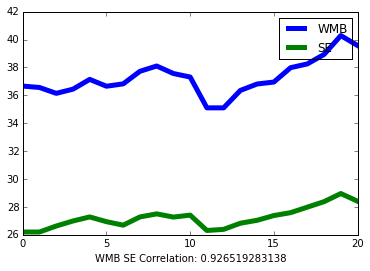

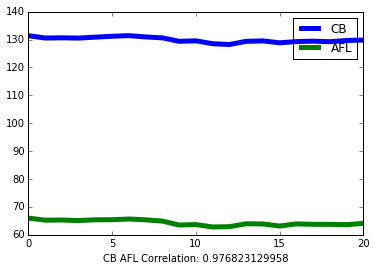

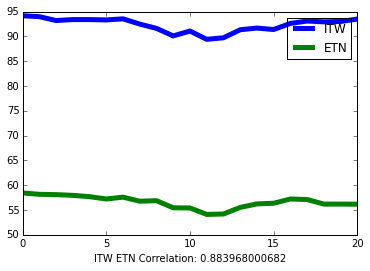

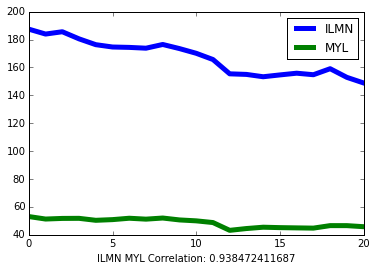

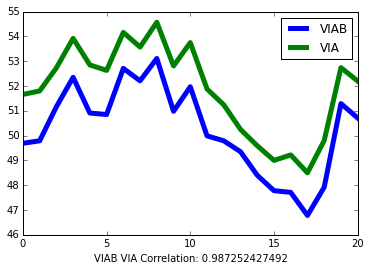

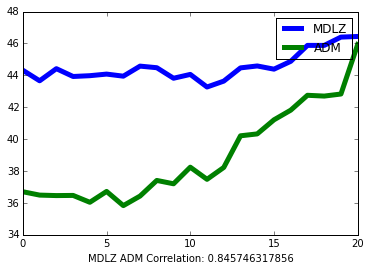

newStocks:  ['AVGO', 'WMB', 'CB', 'ITW', 'ILMN', 'VIAB', 'MDLZ']
sectors up for auction:  [['AVGO', 'WMB', 'CB', 'ITW', 'ILMN', 'VIAB', 'MDLZ'], ['BRCM', 'SE', 'AFL', 'ETN', 'MYL', 'VIA', 'ADM']]
auction type:  combinatorial
bids:  4 3 2
Here are the sectors you won at auction.  You may now test for inter-sector correlation using these:  [['AVGO', 'WMB', 'CB', 'ITW', 'ILMN', 'VIAB', 'MDLZ'], ['BRCM', 'SE', 'AFL', 'ETN', 'MYL', 'VIA', 'ADM']]
sectors:  [['AVGO', 'WMB', 'CB', 'ITW', 'ILMN', 'VIAB', 'MDLZ'], ['BRCM', 'SE', 'AFL', 'ETN', 'MYL', 'VIA', 'ADM']]
Sector: Pair1
Sector: Pair2
corr:  0.022400366055
highcorr:  0.022400366055
corr:  0.660553886646
highcorr:  0.660553886646
corr:  0.712612823282
highcorr:  0.712612823282
corr:  0.874540253589
highcorr:  0.874540253589
corr:  0.773611118595
highcorr:  0.773611118595
corr:  0.878915925363
highcorr:  0.878915925363
[[[132.889999, 130.449997, 130.039993, 128.389999, 128.339996, 124.410004, 126.400002, 125.209999, 125.919998, 122.059998,

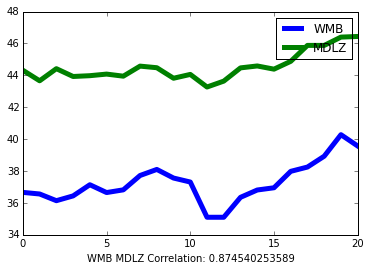

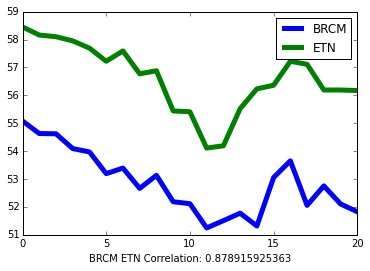

In [3]:
__author__ = 'andy'

%matplotlib inline

import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages')

import pdb
import numpy as np
import yahoo_finance as y
from pandas import *
import matplotlib.pyplot as plot
import random



def main():
    #goog = DataReader('GOOG',  'yahoo', datetime(2000,1,1), datetime(2012,1,1))
    #print(goog['Adj Close'])
    #exit(1)

    yahoo = y.Share('YHOO')

    sectorsTxt = ['it','energy','financials','industrials','healthcare','consumerdisc','consumerstaples']
    it = ['CTSH','ADP','PYPL','YHOO','AVGO','EBAY','BRCM','GLW','MU','VMW']
    energy = ['PSX','APC','HAL','WMB','VLO','MPC','BHI','SE','DVN','APA']
    financials = ['CB','MMC','BBT','CME','STT','EQR','AFL','ALL','DFS','BEN']
    industrials = ['PCP','EMR','AAL','CSX','DE','ITW','ETN','NSC','WM','CMI']
    healthcare = ['SYK','BDX','HUM','VRTX','CAH','HCA','ILMN','BAX','MYL','BXLT']
    consumerdisc = ['CMCSK','TSLA','CBS','CCL','LVS','VIAB','FOX','TRI','DISH','VIA']
    consumerstaples = ['MDLZ','COST','CL','KHC','KMB','RAI','KR','GIS','ADM','EL']

    sectors = [it,energy,financials,industrials,healthcare,consumerdisc,consumerstaples]

    auctionType = "combinatorial" #combinatorial

    print energy

    print yahoo.get_price()
    print yahoo.get_open()
    print yahoo.get_prev_close()
    startDate = '2015-11-01'
    endDate = '2015-12-01'
    histdata = yahoo.get_historical(startDate,endDate)
    tickPrices = []
    for i in histdata: tickPrices.append(float(i['Adj_Close']))
    print histdata
    print tickPrices
    #exit(1)

    sectorPrices = []
    i=0
    for sector in sectors:
        print "Sector: " + str(sectorsTxt[i])
        prices=[]
        for ticker in sector:
            tickerPrices = y.Share(ticker).get_historical(startDate,endDate)
            cleanPrices =[]
            for j in tickerPrices: cleanPrices.append(float(j['Adj_Close']))
            prices.append(cleanPrices)
        sectorPrices.append(prices)
        i+=1

    highcorrs = []
    highpairs = []
    a=0
    for i in sectorPrices:
        b=0
        highcorr=0.0
        highpair=''
        for j in sectorPrices[a]:
            c=0
            for k in sectorPrices[a]:
                if b!=c:
                    corr = np.corrcoef(sectorPrices[a][b],sectorPrices[a][c])[1,0]
                    if corr > highcorr: #and (random.randint(1,3) % 3 != 1):
                        highcorr= corr
                        highpair= str(sectors[a][b] + ',' + sectors[a][c])
                        print "corr: " , corr
                        print "highcorr: " , highcorr
                c+=1
            b+=1
        a+=1
        highcorrs.append(highcorr)
        highpairs.append(highpair)

    print sectorPrices

    #print np.corrcoef(sectorPrices[0],sectorPrices[1])[1,0]
    print highcorrs
    print highpairs

    #printing all the highest correlations
    i=0
    plt=plot
    for sec in sectors:
        pairs=highpairs[i].split(',')
        plt.plot(sectorPrices[i][sec.index(pairs[0])], label=str(pairs[0]), linewidth=5.0)
        plt.plot(sectorPrices[i][sec.index(pairs[1])], label=str(pairs[1]), linewidth=5.0)
        plt.xlabel(str(pairs[0] + " " + pairs[1] + " Correlation: " + str(highcorrs[i])))
        plt.legend()
        plt.show()
        i+=1

    newStocks=[]
    newStocks2=[]
    for stock in highpairs:
        pair = stock.split(',')
        newStocks.append(pair[0])
        newStocks2.append(pair[1])

    #recalculating correlations with highest correlating stocks
    print "newStocks: ", newStocks
    sectors = []
    sectorsTxt = ['Pair1','Pair2']
    sectors.append(newStocks)
    sectors.append(newStocks2)

    #the correlatory pairs you get are based on auction
    sectors = auctionSectors(sectors,auctionType)
    print "sectors: ", sectors
    if (sectors == None):
        print "You are too cheap to win an auction, goodbye!"
        return

    sectorPrices = []
    i=0
    for sector in sectors:
        print "Sector: " + str(sectorsTxt[i])
        prices=[]
        for ticker in sector:
            tickerPrices = y.Share(ticker).get_historical(startDate,endDate)
            cleanPrices =[]
            for j in tickerPrices: cleanPrices.append(float(j['Adj_Close']))
            prices.append(cleanPrices)
        sectorPrices.append(prices)
        i+=1

    highcorrs = []
    highpairs = []
    a=0
    for i in sectorPrices:
        b=0
        highcorr=0.0
        highpair=''
        for j in sectorPrices[a]:
            c=0
            for k in sectorPrices[a]:
                if b!=c:
                    corr = np.corrcoef(sectorPrices[a][b],sectorPrices[a][c])[1,0]
                    if corr > highcorr:
                        highcorr= corr
                        highpair= str(sectors[a][b] + ',' + sectors[a][c])
                        print "corr: " , corr
                        print "highcorr: " , highcorr
                c+=1
            b+=1
        a+=1
        highcorrs.append(highcorr)
        highpairs.append(highpair)

    print sectorPrices

    #print np.corrcoef(sectorPrices[0],sectorPrices[1])[1,0]
    print highcorrs
    print highpairs


    #printing all the highest correlations
    i=0
    plt=plot
    for sec in sectors:
        pairs=highpairs[i].split(',')
        plt.plot(sectorPrices[i][sec.index(pairs[0])], label=str(pairs[0]), linewidth=5.0)
        plt.plot(sectorPrices[i][sec.index(pairs[1])], label=str(pairs[1]), linewidth=5.0)
        plt.xlabel(str(pairs[0] + " " + pairs[1] + " Correlation: " + str(highcorrs[i])))
        plt.legend()
        plt.show()
        i+=1

def auctionSectors(sectors,auctionType):
    print "sectors up for auction: ", sectors
    print "auction type: ", auctionType

    #this are our bids, for the 7 correlation pairs
    my_bids = [7,6,5,4,3,2,1]
    other_bidder1 = [3,3,3,3,3,3,3]
    other_bidder2 = [10,10,0,0,0,0,0]

    sectorsWon=[[],[]]#empty 2D array
    if auctionType == "combinatorial":
        my_avg_bid= sum(my_bids) / my_bids.__len__()
        other_avg_bid1= sum(other_bidder1) / other_bidder1.__len__()
        other_avg_bid2= sum(other_bidder2) / other_bidder2.__len__()
        print "bids: ", my_avg_bid, other_avg_bid1, other_avg_bid2

        if my_avg_bid > other_avg_bid1 and my_avg_bid > other_avg_bid2:
            sectorsWon=sectors
        else:
            print "you lost the combinatorial auction"

    elif auctionType == "english":
        sectorsWon=[[],[]]
        for i in range(my_bids.__len__()):
            if my_bids[i] >= other_bidder1[i] and my_bids[i] >= other_bidder2[i]:
                sectorsWon[0].append(sectors[0][i])
                sectorsWon[1].append(sectors[1][i])
                print "sectorsWon[0],[1]: ", sectorsWon, sectors
    else:
        print "bad auctionType.  please rerun using a valid auction type: combinatorial, english"

    print "Here are the sectors you won at auction.  You may now test for inter-sector correlation using these: ", sectorsWon
    return sectorsWon



if __name__ == "__main__": main()
